<a href="https://colab.research.google.com/github/ramrkc/data-processing-of-dataset-pokemon/blob/main/data_processing_of_dataset_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import os

In [ ]:
# Get csv for type labels
pokemon_stats = pd.read_csv('/content/drive/MyDrive/pokemon image dataset/pokemon.csv')
pokemon_stats.set_index("Name")

# Get images for prediction
image_dir = "../content/drive/MyDrive/pokemon image dataset/images/images/"
imgs = os.listdir(image_dir)
pokemon_filenames = pd.DataFrame([[x.split(".")[0] for x in imgs],imgs]).T
pokemon_filenames.columns = ['Name','Filepath']
pokemon_filenames.set_index('Name')

,Filepath
Name,
chansey,chansey.png
cherrim,cherrim.png
crobat,crobat.png
altaria,altaria.png
cofagrigus,cofagrigus.png
...,...
furret,furret.png
passimian,passimian.jpg
wishiwashi-solo,wishiwashi-solo.jpg


In [ ]:
pokemon_stats.head(10)

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
5,charizard,Fire,Flying
6,squirtle,Water,NaN
7,wartortle,Water,NaN
8,blastoise,Water,NaN
9,caterpie,Bug,NaN


In [ ]:
TYPES = {
    0:"Water",
    1:"Normal",
    2:"Grass", 
    3:"Bug" ,
    4:"Psychic",
    5:"Fire" ,
    6:"Rock",
    7:"Electric",
    8:"Poison",
    9:"Ground", 
    10:"Fighting",
    11:"Dark",
    12:"Dragon",
    13:"Ghost",
    14:"Steel", 
    15:"Ice",
    16:"Fairy",
    17:"Flying"  
}

In [ ]:
key_list = list(TYPES.keys())
val_list = list(TYPES.values())

position = val_list.index("Fire")
print(key_list[position])

5


In [ ]:
def replace_type(x):
    position = val_list.index(x)
    return key_list[position]

def get_rgb_images(file):
    if file.split(".")[1] == "jpg":
        im = Image.open(image_dir+ file)
        return np.asarray(im).astype(np.float32)
    else:
        im = Image.open(image_dir+ file).convert('RGBA')
        im.load()
        new_im = Image.new("RGB", im.size, (255, 255, 255))
        new_im.paste(im, mask = im.split()[3])
        return np.asarray(new_im).astype(np.float32)

pokemon_joined = pokemon_stats.merge(pokemon_filenames,how='outer',indicator=True)
pokemon_joined["Name"] = pokemon_joined["Name"].apply(lambda x: x.split('-')[0])
pokemon_joined["Type1"] = pokemon_joined.apply(lambda x: replace_type(x['Type1']), axis=1)
pokemon_joined["Image"] = pokemon_joined.apply(lambda x: get_rgb_images(x['Filepath']), axis=1)
pokemon_joined



,Name,Type1,Type2,Filepath,_merge,Image
0,bulbasaur,2,Poison,bulbasaur.png,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
1,ivysaur,2,Poison,ivysaur.png,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
2,venusaur,2,Poison,venusaur.png,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
3,charmander,5,NaN,charmander.png,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
4,charmeleon,5,NaN,charmeleon.png,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
...,...,...,...,...,...,...
804,stakataka,6,Steel,stakataka.jpg,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
805,blacephalon,5,Ghost,blacephalon.jpg,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
806,zeraora,7,NaN,zeraora.jpg,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
807,meltan,14,NaN,meltan.jpg,both,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."


In [ ]:
pokemon_joined["_merge"].value_counts()

both          809
left_only       0
right_only      0
Name: _merge, dtype: int64

In [ ]:
pokemon_joined.Type1.value_counts()

0     114
1     105
2      78
3      72
5      53
4      53
6      46
7      40
8      34
9      32
11     29
10     29
13     27
12     27
14     26
15     23
16     18
17      3
Name: Type1, dtype: int64

In [ ]:
import random
from matplotlib import pyplot as plt
from matplotlib import image

def get_filepaths(ds, type_,num):
    idxs = list(ds[ds=="Type1"].index)
    if len(idxs) > num:
        idxs = random.sample(idxs,num)
    pokemon = list(ds['Filepath'][idxs])
    names = list(ds['Name'][idxs])
    images = list(ds["Image"][idxs])
    return list(zip(pokemon,names, images))

In [ ]:
def display_type(type_, nb):
    position = val_list.index(type_)
    type_ = key_list[position]
    
    pkms = pokemon_joined[pokemon_joined["Type1"] == type_]
    filepaths = get_filepaths(pkms, type_, nb)
    
    fig=plt.figure(figsize=(20,3))
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
    plt.text(0.04, 0.5, 'ground truth', fontsize=14, transform=plt.gcf().transFigure)
    
    for j in range(nb):
        ax = fig.add_subplot(1,nb,j+1)
        if j >= len(filepaths):
            plt.box(False)
            plt.xticks([])
            plt.yticks([])
            continue
        filepath,name, image = filepaths[j]
        img = np.asarray(image).astype('uint8')
        plt.imshow(img)
        plt.title(name)
        plt.xticks([])
        plt.yticks([])
            
        spine_color = 'green'
        for spine in ax.spines.values():
            spine.set_edgecolor(spine_color)
            
    plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


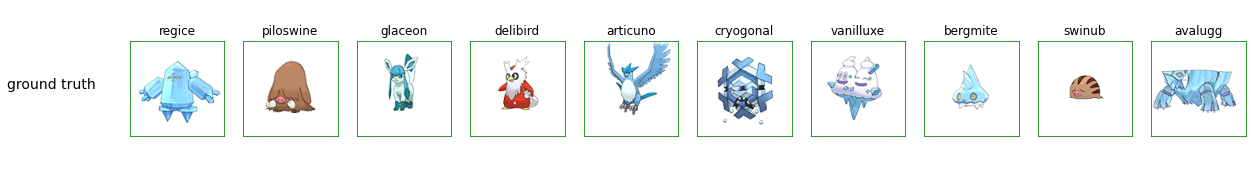

In [ ]:
display_type("Ice", 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(120, 120, 4)


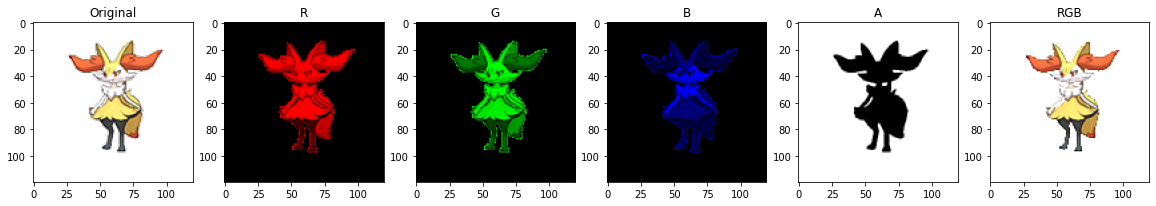

In [ ]:
# Get sample image
rgbImage = image.imread(image_dir+"braixen.png")

# Divide image in 3 channels
redChannel = rgbImage[:, :, 0]
greenChannel = rgbImage[:, :, 1]
blueChannel = rgbImage[:, :, 2]
transpChannel = rgbImage[:, :, 3]
new_transp = (abs(transpChannel - 1) * 255).astype(int)


allblack = np.zeros((120,120))

r = np.dstack((redChannel, allblack, allblack))
g = np.dstack((allblack, greenChannel, allblack))
b = np.dstack((allblack, allblack, blueChannel))
a = np.dstack((allblack, allblack, allblack, transpChannel))

# Display them all.
plt.figure(figsize=(20,3))

plt.subplot(1, 6, 1);
plt.imshow(rgbImage);
plt.fontSize = 20;
plt.title('Original')
plt.subplot(1, 6, 2);
plt.imshow(r);
plt.title('R')
plt.subplot(1, 6, 3);
plt.imshow(g)
plt.title('G')
plt.subplot(1, 6, 4);
plt.imshow(b);
plt.title('B')
plt.subplot(1, 6, 5);
plt.title('A')
plt.imshow(a);

plt.subplot(1, 6, 6);
plt.title('RGB')
rgb = np.dstack((redChannel + new_transp,greenChannel + new_transp,blueChannel + new_transp))
plt.imshow(rgb)
print(rgbImage.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
data = np.array(pokemon_joined["Image"])
xtrain = np.empty((data.shape[0], 120, 120, 3))
for i in range(data.shape[0]):
    xtrain[i] = np.array(data[i])
    
ytrain = np.array(pokemon_joined["Type1"])

print(xtrain.shape)
print(ytrain.shape)

(809, 120, 120, 3)
(809,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.2,random_state=2)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.3,random_state=2)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(647, 120, 120, 3)
(113, 120, 120, 3)
(49, 120, 120, 3)
(647,)
(113,)
(49,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.2,random_state=2)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.3,random_state=2)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(647, 120, 120, 3)
(113, 120, 120, 3)
(49, 120, 120, 3)
(647,)
(113,)
(49,)


5 first training images


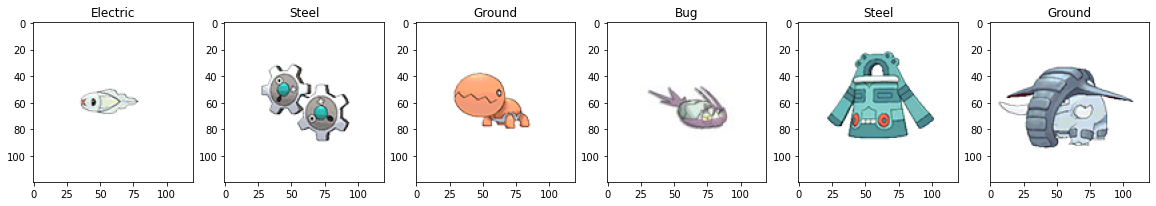

In [ ]:
plt.figure(figsize=(20,3))
plt.subplot(1, 6, 1);
plt.imshow(X_train[0].astype("uint8"))
plt.title(TYPES[y_train[0]])
plt.subplot(1, 6, 2);
plt.imshow(X_train[1].astype("uint8"))
plt.title(TYPES[y_train[1]])
plt.subplot(1, 6, 3);
plt.imshow(X_train[2].astype("uint8"))
plt.title(TYPES[y_train[2]])
plt.subplot(1, 6, 4);
plt.imshow(X_train[3].astype("uint8"))
plt.title(TYPES[y_train[3]])
plt.subplot(1, 6, 5);
plt.imshow(X_train[4].astype("uint8"))
plt.title(TYPES[y_train[4]])
plt.subplot(1, 6, 6);
plt.title(TYPES[y_train[5]])
plt.imshow(X_train[5].astype("uint8"))
print("5 first training images")

In [ ]:
X_train /= 255.0
X_test /= 255.0

In [ ]:
# Model creation
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(120,120, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,2),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(18))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 58, 64)        12352     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 27, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 44928)             0

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 11s 491ms/step - loss: 2.8677 - accuracy: 0.1144 - val_loss: 2.7973 - val_accuracy: 0.1593
Epoch 2/10
21/21 [==============================] - 10s 502ms/step - loss: 2.7518 - accuracy: 0.1437 - val_loss: 2.7693 - val_accuracy: 0.1327
Epoch 3/10
21/21 [==============================] - 9s 439ms/step - loss: 2.6781 - accuracy: 0.1577 - val_loss: 2.7550 - val_accuracy: 0.1770
Epoch 4/10
21/21 [==============================] - 9s 438ms/step - loss: 2.6093 - accuracy: 0.1824 - val_loss: 2.7868 - val_accuracy: 0.1681
Epoch 5/10
21/21 [==============================] - 9s 448ms/step - loss: 2.5159 - accuracy: 0.2226 - val_loss: 2.7113 - val_accuracy: 0.1593
Epoch 6/10
21/21 [==============================] - 9s 450ms/step - loss: 2.3868 - accuracy: 0.2396 - val_loss: 2.7651 - val_accuracy: 0.1681
Epoch 7/10
21/21 [==============================] - 10s 457ms/step - loss: 2.2047 - accuracy: 0.3107 - val_loss: 2.8142 - val_accuracy: 0.1504
Epo

4/4 - 1s - loss: 3.5342 - accuracy: 0.1770 - 687ms/epoch - 172ms/step


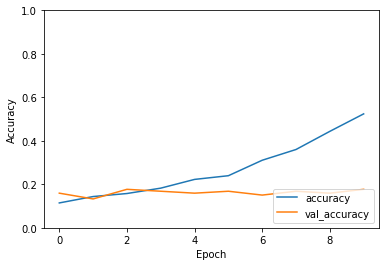

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [ ]:
data2 = np.array(pokemon_joined.Image[(pokemon_joined["Type1"] == 0) | (pokemon_joined["Type1"] == 2)])
xtrain = np.empty((data2.shape[0], 120, 120, 3))
for i in range(data2.shape[0]):
    xtrain[i] = np.array(data2[i])

ytrain = np.array(pokemon_joined.Type1[(pokemon_joined["Type1"] == 0) | (pokemon_joined["Type1"] == 2)])

print(xtrain.shape)
print(ytrain.shape)

(192, 120, 120, 3)
(192,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.2,random_state=2)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.3,random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(153, 120, 120, 3)
(27, 120, 120, 3)
(12, 120, 120, 3)
(153,)
(27,)
(12,)


5 first training images


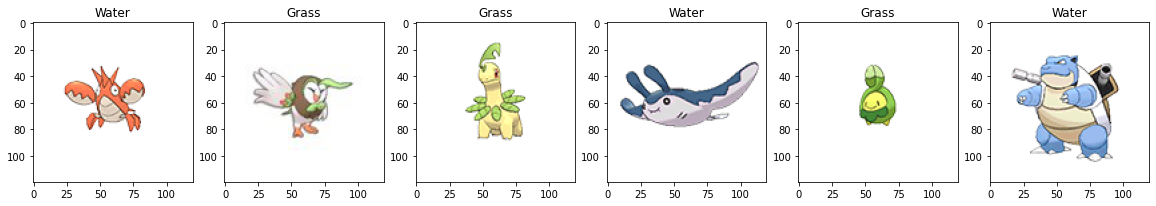

In [ ]:
plt.figure(figsize=(20,3))
plt.subplot(1, 6, 1);
plt.imshow(X_train[0].astype("uint8"))
plt.title(TYPES[y_train[0]])
plt.subplot(1, 6, 2);
plt.imshow(X_train[1].astype("uint8"))
plt.title(TYPES[y_train[1]])
plt.subplot(1, 6, 3);
plt.imshow(X_train[2].astype("uint8"))
plt.title(TYPES[y_train[2]])
plt.subplot(1, 6, 4);
plt.imshow(X_train[3].astype("uint8"))
plt.title(TYPES[y_train[3]])
plt.subplot(1, 6, 5);
plt.imshow(X_train[4].astype("uint8"))
plt.title(TYPES[y_train[4]])
plt.subplot(1, 6, 6);
plt.title(TYPES[y_train[5]])
plt.imshow(X_train[5].astype("uint8"))
print("5 first training images")

In [ ]:
X_train /= 255.0
X_test /= 255.0

In [ ]:
# Model creation
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(120,120, 3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,2),activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(18))
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 58, 64)        12352     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 27, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 44928)            

In [ ]:
history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 3s 480ms/step - loss: 1.8546 - accuracy: 0.3987 - val_loss: 0.9505 - val_accuracy: 0.5556
Epoch 2/10
5/5 [==============================] - 2s 442ms/step - loss: 0.7595 - accuracy: 0.5163 - val_loss: 0.9218 - val_accuracy: 0.5556
Epoch 3/10
5/5 [==============================] - 2s 441ms/step - loss: 0.7166 - accuracy: 0.5621 - val_loss: 0.9295 - val_accuracy: 0.5556
Epoch 4/10
5/5 [==============================] - 2s 447ms/step - loss: 0.8593 - accuracy: 0.4837 - val_loss: 1.0960 - val_accuracy: 0.5556
Epoch 5/10
5/5 [==============================] - 2s 459ms/step - loss: 0.7561 - accuracy: 0.5556 - val_loss: 0.6900 - val_accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 2s 447ms/step - loss: 0.6117 - accuracy: 0.6601 - val_loss: 0.6920 - val_accuracy: 0.5926
Epoch 7/10
5/5 [==============================] - 2s 506ms/step - loss: 0.5469 - accuracy: 0.7908 - val_loss: 0.8859 - val_accuracy: 0.5556
Epoch 8/10
5/5 [====

1/1 - 0s - loss: 104.4092 - accuracy: 0.7500 - 60ms/epoch - 60ms/step


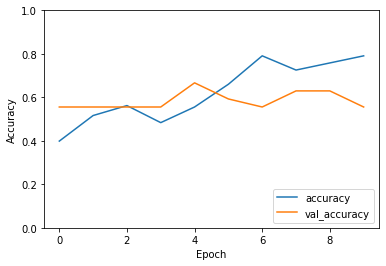

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(X_val, y_val, verbose=2)